# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## ABOUT THE DATASET

**Context**
<br>A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?
This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

**Content**
<br>110,527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!
<br>Scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

**COLUMNS**
 <ul>
 <li> PatientId (Identification of a patient)
 <li> AppointmentID (Identification of each appointment)
 <li> Gender (Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.)
 <li> DataMarcacaoConsulta (The day of the actuall appointment, when they have to visit the doctor.)
 <li> DataAgendamento (The day someone called or registered the appointment, this is before appointment of course.)
 <li> Age (How old is the patient.)
 <li> Neighbourhood (Where the appointment takes place.)
 <li> Scholarship (True of False . Observation, this is a broad topic, consider reading this article) https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
 <li> Hipertension (True or False)
 <li> Diabetes (True or False)
 <li> Alcoholism (True or False)
 <li> Handcap (True or False)
 <li> SMS_received (1 or more messages sent to the patient.)
 <li> No-show (True or False.)
 <ul>

## Import Libraries

> Important Libraries for the analysis.

In [1]:
# Import all neccesary libraries to for use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the Data
> Importing the dataset on which the analysis is to be performed.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv("C:\\Users\\DELL\\Downloads\\noshowappointments-kagglev2-may-2016.csv")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> - Assess the properties of the data. 
> - Assess the columns, rows, shape, and datatype to ensure the data is clean and good for analysis.

In [3]:
# Check the data head for the first three columns.

df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
# Brief information of the data structure, it columns, rows and datatype.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- From the above output, Our data has 14 columns, 110527 rows. With float, integer and string datatypes.

In [5]:
# Check the dimension of the data

df.shape

(110527, 14)

The dataset has 14 columns and 110527 row

In [6]:
# Statisstical summary of the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The above output showsthe statistical summary of the entire dataset.(Count, mean, max, min and quartiles of each numeric column)

In [7]:
# Check for duplicates

df.duplicated().value_counts()

False    110527
dtype: int64

- There are no duplicated rows in our dataset

In [8]:
# Check for unique values

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- The output above shows that in total there were about 62,299 patients in total who booked appointments, staying at 81 different locations and of varying ages.

In [9]:
# Check for missing data

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- The output above shows there are no missing data in any of the columns.

In [10]:
# From the overview of the data above the min age is -1, which is not right check for ages below 1
df.query('Age<0')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


- In the statistical summary above, we saw that the min age is -1, the above output confirms that there is a row with an age of -1. This will be dealt with in the Data cleaning session.

- Issues found with the Data:
> - Negative age number of -1
> - Column name using hyphen (no-show)
> - Columns names are in the Title case format. (capitalize first letter of each word)

## Data Cleaning (Medical Appointment Dataset)

> Let's create a duplicate of the original dataset
 Where we would perform the following actions
> - Drop the row with age of -1
 > - Rename the column no-show.
 > - Convert all the column name to lowercase

### Code

In [11]:
# Create a duplicate of the dataset to clean and perform analysis on and check the new dataset

df_new = df.copy()
df_new.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Test

In [12]:
# Check the duplicated dataset
df_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Code

In [13]:
# Delete the row With -1 Age Value

df_new.drop(labels=99832,axis=0,inplace=True)

### Test

In [14]:
# Now check again for the ages below 0 to see if there still exist any age below 0.

df_new.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Code

In [1]:
# Define a function that can rename columns and return the names of the columns

def column_name(data,old,new):
    data.rename(columns={old:new},inplace=True)
    return data.columns

In [16]:
#The Column name No-show would give issues when trying to reference it,
# So rename it missed_appointment To make it easier to reference

column_name(df_new,"No-show","missed_appointment")

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'missed_appointment'],
      dtype='object')

### Code

In [17]:
# Convert all the columns name to lower case.

df_new.columns = df_new.columns.str.strip().str.lower()

### Test

In [18]:
df_new.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'missed_appointment'],
      dtype='object')

## Assessing the dataset to confirm our Data is clean.

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   patientid           110526 non-null  float64
 1   appointmentid       110526 non-null  int64  
 2   gender              110526 non-null  object 
 3   scheduledday        110526 non-null  object 
 4   appointmentday      110526 non-null  object 
 5   age                 110526 non-null  int64  
 6   neighbourhood       110526 non-null  object 
 7   scholarship         110526 non-null  int64  
 8   hipertension        110526 non-null  int64  
 9   diabetes            110526 non-null  int64  
 10  alcoholism          110526 non-null  int64  
 11  handcap             110526 non-null  int64  
 12  sms_received        110526 non-null  int64  
 13  missed_appointment  110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [20]:
df_new.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,missed_appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
df_new.dtypes

patientid             float64
appointmentid           int64
gender                 object
scheduledday           object
appointmentday         object
age                     int64
neighbourhood          object
scholarship             int64
hipertension            int64
diabetes                int64
alcoholism              int64
handcap                 int64
sms_received            int64
missed_appointment     object
dtype: object

> - Our data is clean. Now we can proceed to analysing our data.

<a id='eda'></a>
# Exploratory Data Analysis & Visualization



## Research Question 1 (What is the Number of Patients Who missed their appointments against those who didn't?)

In [22]:
# Create a function with which the height and width of a plot can be created

def plot(width, height):
    plt.figure(figsize=[width,height])
    

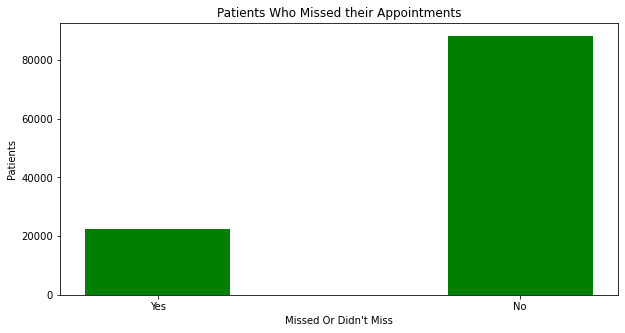

In [23]:
# Let's seperate the Patient attendance into two, those who made the appointment and those who didn't.

Yes =df_new.query("missed_appointment=='Yes'")
No =df_new.query("missed_appointment=='No'")

# Plot a graph showing the number of patients who missed their appointments against those who showed up for their appointments

fig = plot(10,5)
plt.bar(['Yes','No'], [Yes.missed_appointment.count(),No.missed_appointment.count()], color ='green',width = 0.4)
plt.xlabel("Missed Or Didn't Miss")
plt.ylabel("Patients")
plt.title("Patients Who Missed their Appointments")
plt.show()

- The output above shows that those who missed their appoiments are not much compared to those who made their appoinments. 
> Let's take a look at the percentage of those who missed their appointments to those who didn't

In [24]:
print('Number Of Those who Missed their Appointments :', Yes.missed_appointment.count(),'\n',
      'Number Of those who made their appointments :', No.missed_appointment.count(),'\n',
      'Percentage Of  those missed who missed their appoinments:',(Yes.missed_appointment.count()/No.missed_appointment.count()*100),'%')

Number Of Those who Missed their Appointments : 22319 
 Number Of those who made their appointments : 88207 
 Percentage Of  those missed who missed their appoinments: 25.30298048907683 %


Percentage Of  those who did not Attend To those that attended : 25.30298048907683 %

## Research Question 2  (Which Gender missed Appointments the Most ? )

In [25]:
# Let's count the total number of Male against Female Patients.

df_new.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

There are are 71839 females against 38687 males. The gender distribution of our sample is skewed towards the female gender.

In [26]:
# To get the ratio of male against female. We first seperate the genders into two different dataframes then divide.

male = df_new.gender[df_new.gender=='M']
female = df_new.gender[df_new.gender=='F']

In [27]:
print('Percentage of Male: ', (male.count()/df_new.gender.count()) * 100,'%','\n', 'Percentage of Female: ', (female.count()/df_new.gender.count()) * 100,'%' )

Percentage of Male:  35.00262381702043 % 
 Percentage of Female:  64.99737618297956 %


- As earlier stated, the sample in our dataset is skewed towards the Female gender, as such the percentage of female patients to male patients is about 29%

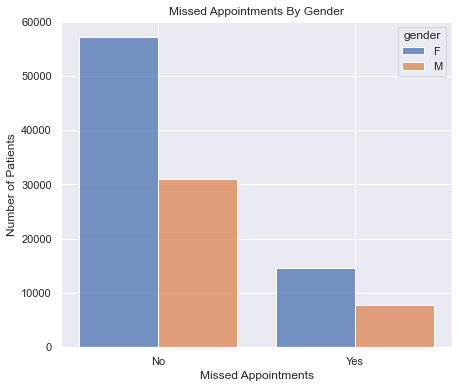

In [28]:
# Now lets see the number of male and female that missed and made their appoinments.

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(7,6)})
ax = sns.histplot(data=df_new, x="missed_appointment", hue="gender", multiple="dodge", shrink=.8)
ax.set(title='Missed Appointments By Gender',xlabel='Missed Appointments', ylabel='Number of Patients');

> The number of females who missed appointments is relatively higher compared to the number of males who missed appointments. This is not surprising, as the total number of female patients is almost double the total number of male patients.

## Research Question 3  (Does Age Affect Patient Attendance ? )

In [29]:
# Check kfor both the Maaximum and Minimum age

print(df_new.age.max())
print(df_new.age.min())

115
0


> The output above shows the minimum and maximum age of the patients to be 0 and 115 respectively.

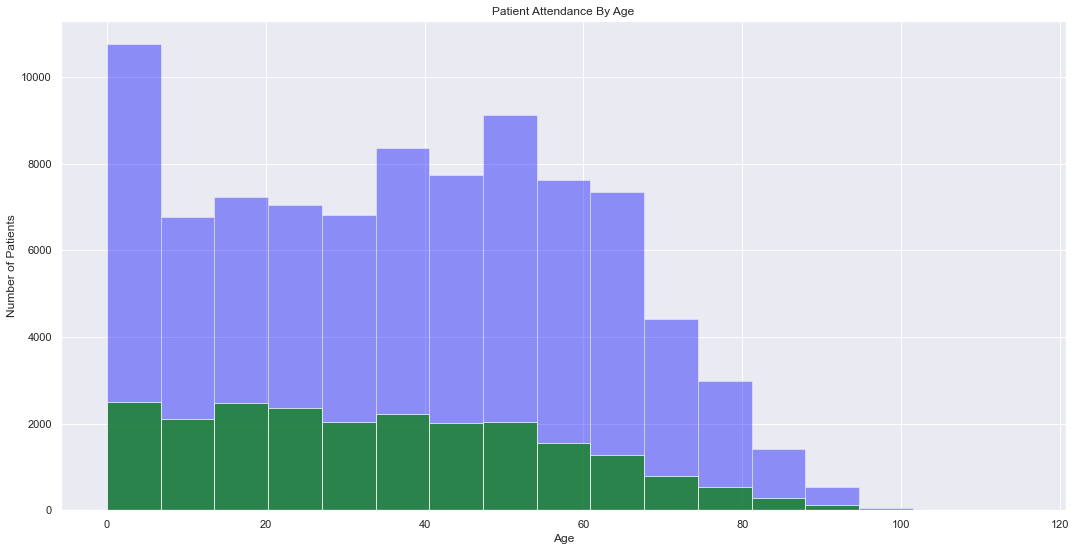

In [30]:
# Using the already seperated dataframes from missed_ appoinments in reasearch question 

No = df_new.missed_appointment=='No'
Yes = df_new.missed_appointment=='Yes'


# Create an Histagram of Patients Age by patient attendance

plot(18,9)
df_new['age'][No].hist(alpha=.4,bins=17,color='blue',label='Made their Appointment')
df_new['age'][Yes].hist(alpha=.7,bins=17,color='green',label='Missed their Appoinment')
plt.title('Patient Attendance By Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients');

From the diagram above, We can say Age does affect Patients attendance. Patients whose ages fall between 0 to 8 and patient between the age of 45 to 61 Years Old have the Most Attendance. 

<a id='conclusions'></a>
## Conclusions


After a brief exploration of the Dataset, It was discovered that:

1. The number of Patients that made their appointments is more than those who didn't make their appointments. Fixing the Percentage Of those who missed their appoinments at 25.30 %

2. The number of male to female patients was 35.00262381702043 % , and it was discovered that females are more prone to miss their appoinments than male.

3. Also, It was noticed that Age had impact on whether patients where going to make their appointments or not. As patients between the age of 0 to 8 and 45 to 60 had the highest number of attendance.

> Limitation
Data on the employment status of the patients was not available, thereby limiting further analysis into the age brackets with high attendance been a factor of their employment status. 
Also, the distance to the hospital could be a factor which influenced the patients appointment meetings, but data regards that, was not readily available for use.

### References

1. https://stackoverflow.com/questions/69649022/keyerror-none-of-indexurl-dtype-object-are-in-the-columns
2.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
3. https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column
4. https://stackoverflow.com/questions/52086574/pandas-isna-and-isnull-what-is-the-difference
5. https://www.kaggle.com/code/muhammedzidan/ooh-that-s-the-problem
6. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
7. https://www.w3schools.com/python/python_tuples.asp
8. https://www.activestate.com/resources/quick-reads/how-to-access-a-column-in-a-dataframe-using-pandas/
9. https://datatofish.com/strings-to-datetime-pandas/